In [1]:
# !pip3 install scikit-learn
# !pip3 install category_encoders
# !pip3 install xgboost
# !pip3 install eli5
!pip3 install pdpbox

  Using cached PDPbox-0.2.1.tar.gz (34.0 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\user\AppData\Local\Temp\pip-install-3y6znxm8\sklearn_f22409f74d25420d800bb5e95c9e2f49\setup.py", line 10, in <module>
          LONG_DESCRIPTION = f.read()
      UnicodeDecodeError: 'cp949' codec can't decode byte 0xe2 in position 2: illegal multibyte sequence
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [28]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt

log_dir = 'C:/Users/user/rally_project/data/Rally_style/log/'
pcsv_dir = 'C:/Users/user/rally_project/data/Rally_style/CSV_preprocessed/'
filename = 'project2_data.csv'
df = pd.read_csv(pcsv_dir + filename)
df = df.drop('Unnamed: 0',axis=1)
df.head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_12108\2731617261.py:8: DtypeWarning: Columns (58,61,67,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(pcsv_dir + filename)


,Time(s),Lap(s),Distance(m),Complete%,X,Y,Z,speed(km/h),X vel,Y vel,...,current_pacenote_next_direction,current_pacenote_length,current_pacenote_width,current_pacenote_caution,current_pacenote_continue,pace_time(s),Delta steering,Delta throttle,Delta brake,Delta clutch
0,28.567856,2.416570,15.800781,0.003607,-1600.159546,483.638428,2995.896484,52.661560,13.158561,0.122939,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,-35.999640,0.0,60.002400
1,28.584576,2.433236,16.045563,0.003663,-1599.939941,483.640472,2995.789795,52.728127,13.173642,0.123346,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,-35.999640,0.0,60.002400
2,28.601223,2.449902,16.289108,0.003718,-1599.720459,483.642334,2995.683105,52.714771,13.168942,0.112298,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,0.000000,0.0,0.000000
3,28.617910,2.466568,16.533379,0.003774,-1599.501099,483.644043,2995.576416,52.701351,13.164785,0.101706,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,0.000000,0.0,0.000000
4,28.634604,2.483234,16.777603,0.003830,-1599.281738,483.645752,2995.469727,52.686554,13.159909,0.103074,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,0.000000,0.0,0.000000
5,28.651329,2.499900,17.022602,0.003886,-1599.062134,483.647705,2995.362793,52.747002,13.172989,0.117199,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,0.000000,0.0,-5.986199
6,28.667988,2.516566,17.267204,0.003942,-1598.841919,483.649689,2995.255371,52.916794,13.213669,0.118117,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,0.000000,0.0,-5.986199
7,28.684637,2.533232,17.512821,0.003998,-1598.620483,483.651611,2995.147461,53.204967,13.284941,0.114663,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,0.000000,0.0,-5.986199
8,28.701307,2.549898,17.760635,0.004054,-1598.397461,483.653503,2995.038818,53.603909,13.384657,0.113394,...,right,NaN,NaN,NaN,NaN,2.57,0.00864,13.255670,0.0,-5.986199
9,28.717999,2.566564,18.010727,0.004111,-1598.172485,483.655457,2994.929199,54.064785,13.499905,0.117102,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,13.333913,0.0,-5.986199


Total 52 columns in log data.

Columns description
# Data Dictionary 

Time (s) : time mark at the that moment
Lap (s) : start when lap is > 0
Distance (m): distance traveled at that moment in meters
Complete: percentage of stage completed
X : car position X
Y : car position Y
Z : car position Z
speed (km/h) : speed in km/h
X vel: car speed X
Y vel : car speed Y
Z vel : car speed Z
X Rdir : car right direction X
Y Rdir : car right direction Y
Z Rdir : car right direction Z
X Fdir : car forward direction X
Y Fdir : car forward direction Y
Z Fdir : car forward direction Z
SP-FL : suspension position front left
SP-FR : suspension position front right
SP-RL : suspension position rear left
SP-RR : suspension position rear right
DampV : FL : damper velocity front left
DampV : FR : damper velocity front right
DampV : RL : damper velocity rear left
DampV : RR : damper velocity rear right
WheelSpd : FL : wheel speed front left (km/h)
WheelSpd : FR : wheel speed front right (km/h)
WheelSpd : RL : wheel speed rear left (km/h)
WheelSpd : RR : wheel speed rear righ (km/h)
Throttle : throttle position from 0-1 (in 0-100% depressed)
Steering : steering percent (in 0-100% rotated)
Brake: brake position from 0-1 (in 0-100% depressed)
Clutch : clutch position from 0-1 (in 0-100% depressed)
Gear : gear the car is in
fX(G) : G force latitude (G)
fZ(G) : G force longitude (G)
LapNum : IGNORE
RPM : car's engine RPM
RacePos : IGNORE
SectorNum : ranges from 4-8 depending on total stage distance
Sector1Time : IGNORE
Sector2Time : IGNORE
BrakeT - FL : brake temperature front left (C)
BrakeT - FR : brake temperature front right (C)
BrakeT - RL : brake tempterature rear left (C)
BrakeT - RR : brake tempterature rear right (C)
LastLap(s) : IGNORE
Trajectory 
slipFL
slipFR
slipRL
slipRR

<AxesSubplot: xlabel='Slip issue', ylabel='count'>

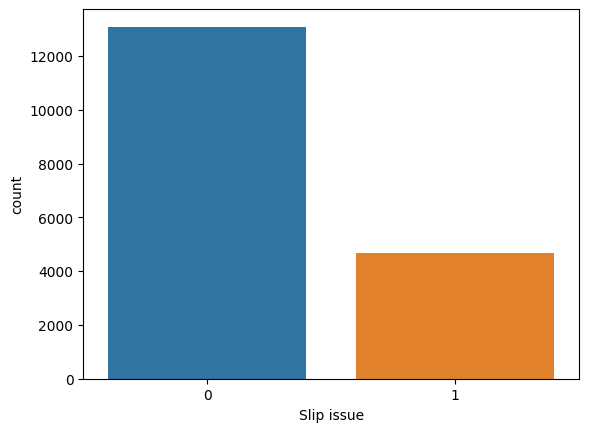

In [110]:
## 바퀴 양쪽이 앞 뒤 각각 크게 임발란스 할 경우 슬립으로 판정.
F_imb = (df['slipFR']-df['slipFL']).abs()>2.5
R_imb = (df['slipRR']-df['slipRL']).abs()>2.5
ndf = df.copy()
ndf['Slip issue'] = F_imb | R_imb
ndf.loc[ndf['Slip issue']==True,'Slip issue'] = 1
ndf.loc[ndf['Slip issue']==False,'Slip issue'] = 0
sns.countplot(x=(ndf['Slip issue']))

In [111]:
new_ndf1 = ndf.drop(['slipFR','slipFL','slipRR','slipRL',
                     'LastLap(s)','Vehicle_tyre','Vehicle_tyre_performance','Vehicle_tyre_durability',
                     'SP-FR','SP-FL','SP-RR','SP-RL','Lap(s)',
                     'X','Y','Z','X vel','Y vel','Z vel','Time(s)','Complete%','Trajectory(deg)','Race Pos','stage_result',
                     'X Rdir','Y Rdir','Z Rdir','X Fdir','Y Fdir','Z Fdir','SectorNum','Sector1Time','Sector2Time',
                     'DampV-FL','DampV-FR','DampV-RL','DampV-RR','BrakeT-FL','BrakeT-FR','BrakeT-RL','BrakeT-RR',
                     'WheelSpd-FR','WheelSpd-FL','WheelSpd-RR','WheelSpd-RL'
                     ]
                     ,axis=1)

## 결측치 처리
new_ndf1 = new_ndf1.fillna('null')
idx = (new_ndf1.dtypes!=float)
new_ndf1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17774 entries, 0 to 17773
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Distance(m)                       17774 non-null  float64
 1   speed(km/h)                       17774 non-null  float64
 2   Throttle                          17774 non-null  float64
 3   Steering                          17774 non-null  float64
 4   Brake                             17774 non-null  float64
 5   Clutch                            17774 non-null  float64
 6   Gear                              17774 non-null  int64  
 7   fX(G)                             17774 non-null  float64
 8   fZ(G)                             17774 non-null  float64
 9   RPM                               17774 non-null  float64
 10  stage_location_condition2         17774 non-null  object 
 11  stage_location_condition3         17774 non-null  object 
 12  prev

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve, f1_score
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV
X = new_ndf1.drop('Slip issue', axis = 1)
y = new_ndf1['Slip issue']
std_col = X.columns[X.dtypes == float]
ord_col = X.columns[X.dtypes != float]

label = np.concatenate((std_col.values,ord_col.values))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)

encoder1 = OrdinalEncoder()
encoder2 = StandardScaler()

X_train_encoded_o = encoder1.fit_transform(X_train[ord_col])
X_val_encoded_o = encoder1.transform(X_val[ord_col])    
X_test_encoded_o = encoder1.transform(X_test[ord_col]) 
X_train_encoded_s = encoder2.fit_transform(X_train[std_col])
X_val_encoded_s = encoder2.transform(X_val[std_col])    
X_test_encoded_s = encoder2.transform(X_test[std_col])
# X_train_encoded_s = X_train[std_col]
# X_val_encoded_s = X_val[std_col]
# X_test_encoded_s = X_test[std_col]


X_train_encoded_o = pd.DataFrame(X_train_encoded_o,columns=ord_col.values).reset_index(drop=True)
X_val_encoded_o = pd.DataFrame(X_val_encoded_o,columns=ord_col.values).reset_index(drop=True)    
X_test_encoded_o = pd.DataFrame(X_test_encoded_o,columns=ord_col.values).reset_index(drop=True)
X_train_encoded_s = pd.DataFrame(X_train_encoded_s,columns=std_col.values).reset_index(drop=True)
X_val_encoded_s =  pd.DataFrame(X_val_encoded_s,columns=std_col.values).reset_index(drop=True)    
X_test_encoded_s =  pd.DataFrame(X_test_encoded_s,columns=std_col.values).reset_index(drop=True)

X_train_encoded = pd.concat((X_train_encoded_o,X_train_encoded_s),axis = 1)
X_val_encoded = pd.concat((X_val_encoded_o,X_val_encoded_s),axis = 1)
X_test_encoded = pd.concat((X_test_encoded_o,X_test_encoded_s),axis = 1)

model = RandomForestClassifier(
    n_estimators=500,  # 매우 큰 값으로 설정했지만, 성능 향상이 없으면 자동으로 종료합니다.
    random_state=42,
    n_jobs=-1,
    max_depth=6
)

params = {
    "max_depth": [4,5,6],
    'oob_score':[True,False],
    "class_weight":['balanced',None]
}

grid_search = GridSearchCV(model, param_grid=params, scoring="roc_auc", cv=5, verbose=3)
grid_search.fit(X_train_encoded, y_train)

RF_result = grid_search.best_estimator_
print(f1_score(y_val,RF_result.predict(X_val_encoded)))
print(roc_auc_score(y_val,RF_result.predict(X_val_encoded)))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END class_weight=balanced, max_depth=4, oob_score=True;, score=0.933 total time=   5.0s
[CV 2/5] END class_weight=balanced, max_depth=4, oob_score=True;, score=0.939 total time=   1.8s
[CV 3/5] END class_weight=balanced, max_depth=4, oob_score=True;, score=0.940 total time=   1.6s
[CV 4/5] END class_weight=balanced, max_depth=4, oob_score=True;, score=0.931 total time=   1.7s
[CV 5/5] END class_weight=balanced, max_depth=4, oob_score=True;, score=0.933 total time=   1.8s
[CV 1/5] END class_weight=balanced, max_depth=4, oob_score=False;, score=0.933 total time=   1.4s
[CV 2/5] END class_weight=balanced, max_depth=4, oob_score=False;, score=0.939 total time=   1.2s
[CV 3/5] END class_weight=balanced, max_depth=4, oob_score=False;, score=0.940 total time=   1.2s
[CV 4/5] END class_weight=balanced, max_depth=4, oob_score=False;, score=0.931 total time=   1.3s
[CV 5/5] END class_weight=balanced, max_depth=4, oob_score=Fal

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_val, RF_result.predict(X_val_encoded)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2094
           1       0.91      0.71      0.80       750

    accuracy                           0.91      2844
   macro avg       0.91      0.84      0.87      2844
weighted avg       0.91      0.91      0.90      2844



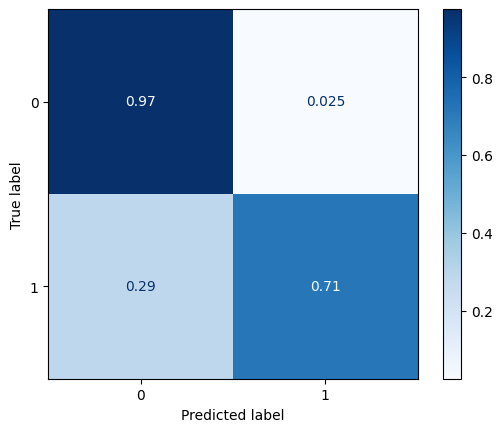

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import seaborn as sns
def plot_confusion_matrix(model, X_val_encoded, y_val):
    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    else:
        y_pred = model.predict(X_val_encoded)
    cm = confusion_matrix(y_val, y_pred, normalize = 'true')
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    plt.show()

plot_confusion_matrix(RF_result, X_val_encoded, y_val)

Text(0, 0.5, 'TPR')

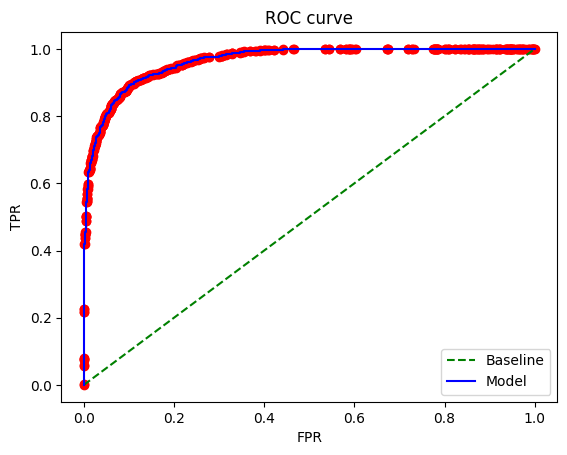

In [34]:
from sklearn.metrics import roc_auc_score,roc_curve, f1_score

baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
fpr, tpr, thresholds = roc_curve(y_val, RF_result.predict_proba(X_val_encoded)[:,1])
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.legend()
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

Text(0.5, 1.0, 'Permutation Importance')

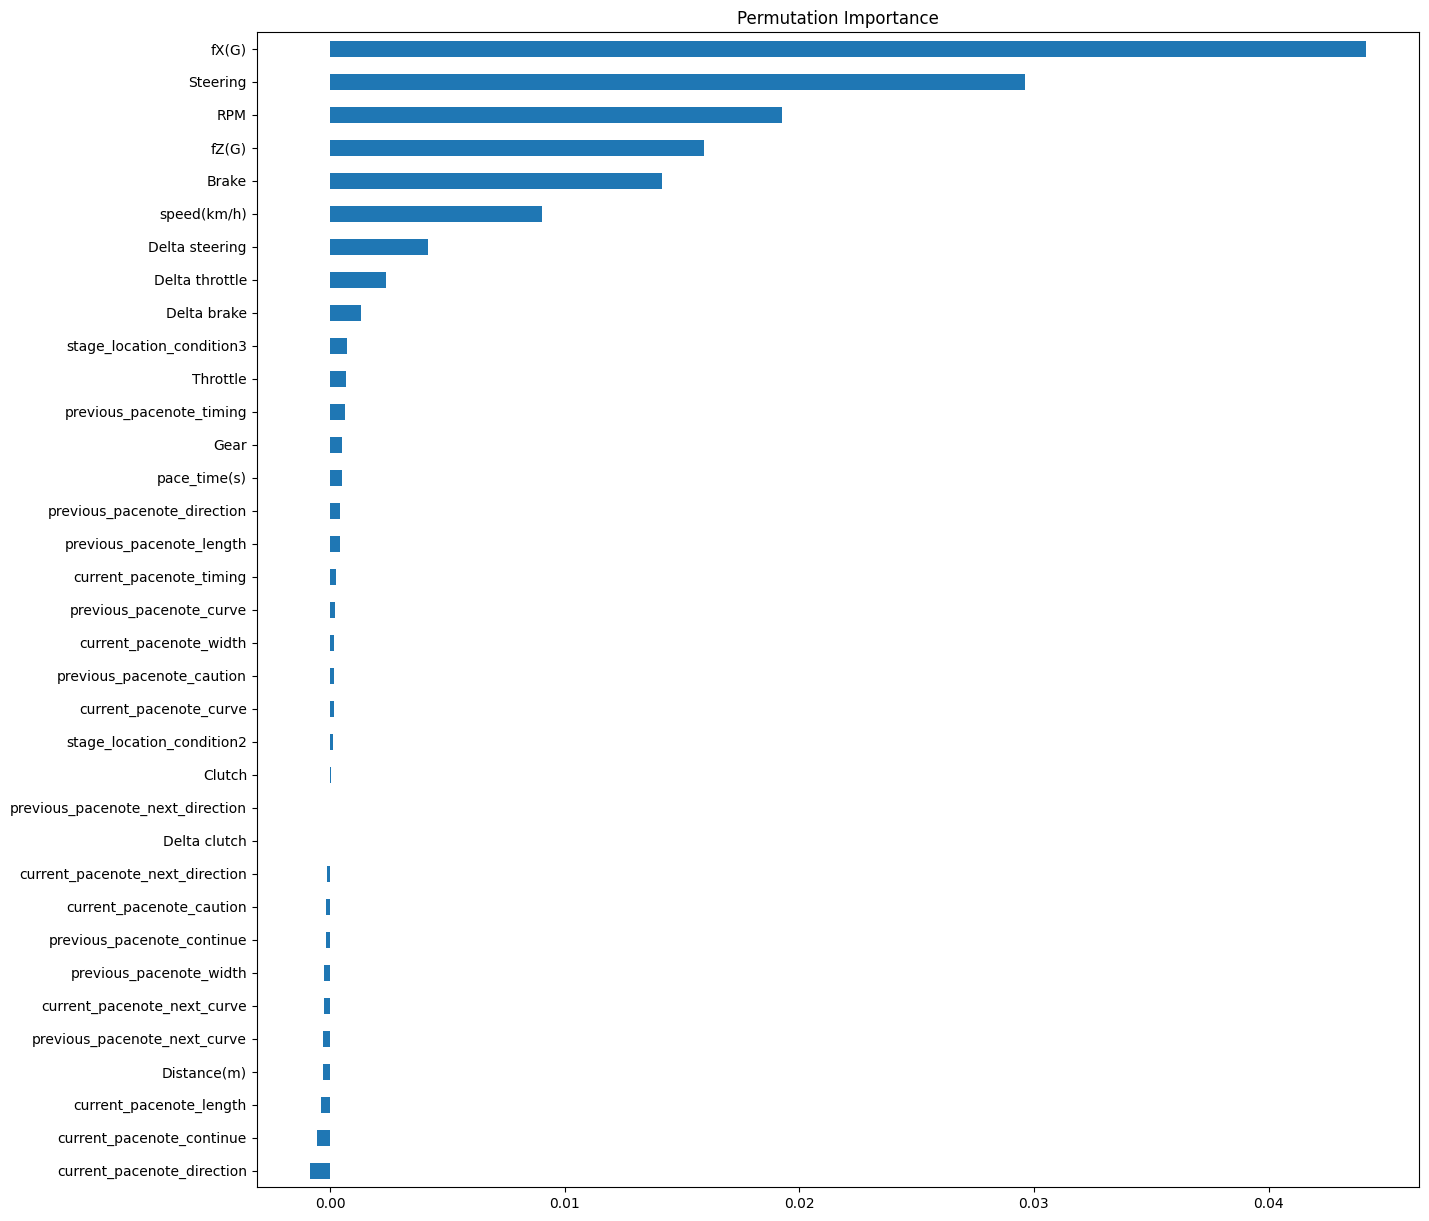

In [37]:
# !pip3 install eli5
import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    RF_result,  # model
    scoring="accuracy",  # metric
    n_iter=8,  # 다른 random seed를 사용하여 8번 반복
    random_state=42,
)

# 스코어를 다시 계산합니다.
permuter.fit(X_val_encoded, y_val)
feature_names = X_val_encoded.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
pi.plot.barh(figsize = (15,15))
plt.title("Permutation Importance")

In [38]:
eli5.show_weights(
    permuter,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names,  # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0442 ± 0.0042,fX(G)
0.0296 ± 0.0042,Steering
0.0193 ± 0.0048,RPM
0.0160 ± 0.0026,fZ(G)
0.0142 ± 0.0026,Brake
0.0090 ± 0.0032,speed(km/h)
0.0042 ± 0.0024,Delta steering
0.0024 ± 0.0018,Delta throttle
0.0013 ± 0.0017,Delta brake
0.0007 ± 0.0015,stage_location_condition3


In [39]:
from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping
from xgboost.sklearn import XGBRFClassifier
from xgboost import DMatrix
from xgboost import train,Booster

# D_train = DMatrix(X_train_encoded, y_train)
# D_valid = DMatrix(X_val_encoded, y_val)

# # Define a custom evaluation metric used for early stopping.
# def eval_error_metric(predt, dtrain: DMatrix):
#     label = dtrain.get_label()
#     r = np.zeros(predt.shape)
#     gt = predt > 0.5
#     r[gt] = 1 - label[gt]
#     le = predt <= 0.5
#     r[le] = label[le]
#     return 'CustomErr', np.sum(r)

# # Specify which dataset and which metric should be used for early stopping.
# early_stop = EarlyStopping(rounds=100,
#                                         metric_name='CustomErr',
#                                         data_name='Train')

# bt = train(
#     {'objective': 'binary:logistic',
#      'eval_metric': ['error', 'auc'],
#       'random_state' : 2,
#     'n_estimators':  9999999,
#     'max_depth': 5,
#     'learning_rate': 0.1,}
#      D_train,
#     evals=[(D_train, 'Train'), (D_valid, 'Valid')],
#     feval=eval_error_metric,
#     num_boost_round=1000,
#     callbacks=[early_stop],
#     verbose_eval=False)

model =  XGBClassifier(
    objective="binary:logistic",
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        n_estimators= 500,
        # random_state=42,
        n_jobs=-1,
        max_depth=5,
        learning_rate=0.01,        
)

params = {
    "max_depth": [6],
    "learning_rate":[0.01,0.1,0.5],
    "scale_pos_weight":[1], #,sum(y_train==0)/sum(y_train==1)],
    "subsample": [0.1,0.5,0.8],
    "colsample_bytree": [0.3, 0.5, 0.8]
}

eset = [(X_train_encoded,y_train),(X_val_encoded,y_val)]


grid_search = GridSearchCV(model, param_grid=params, scoring="roc_auc", cv=5, verbose=3)
grid_search.fit(X_train_encoded, y_train)

xgbc_result = grid_search.best_estimator_
print(f1_score(y_val,xgbc_result.predict(X_val_encoded)))
print(roc_auc_score(y_val,xgbc_result.predict(X_val_encoded)))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, scale_pos_weight=1, subsample=0.1;, score=0.975 total time=   1.4s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, scale_pos_weight=1, subsample=0.1;, score=0.978 total time=   1.6s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, scale_pos_weight=1, subsample=0.1;, score=0.977 total time=   1.4s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, scale_pos_weight=1, subsample=0.1;, score=0.975 total time=   1.4s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, scale_pos_weight=1, subsample=0.1;, score=0.978 total time=   1.5s
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, scale_pos_weight=1, subsample=0.5;, score=0.982 total time=   2.0s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, scale_pos_weight=1, subsample=0.5;, score=0.985 total time= 

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_val, xgbc_result.predict(X_val_encoded)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2094
           1       0.95      0.95      0.95       750

    accuracy                           0.97      2844
   macro avg       0.97      0.97      0.97      2844
weighted avg       0.97      0.97      0.97      2844



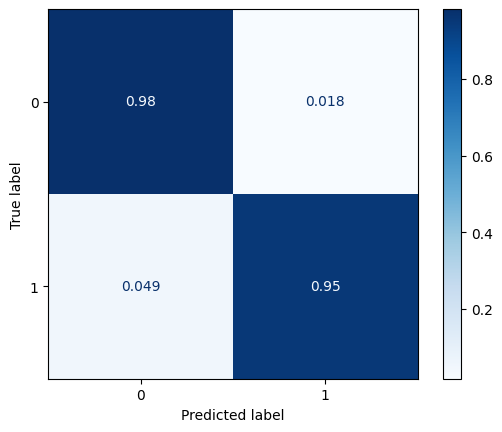

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)>

In [41]:
plot_confusion_matrix(xgbc_result, X_val_encoded, y_val)
xgbc_result.get_params

Text(0, 0.5, 'TPR')

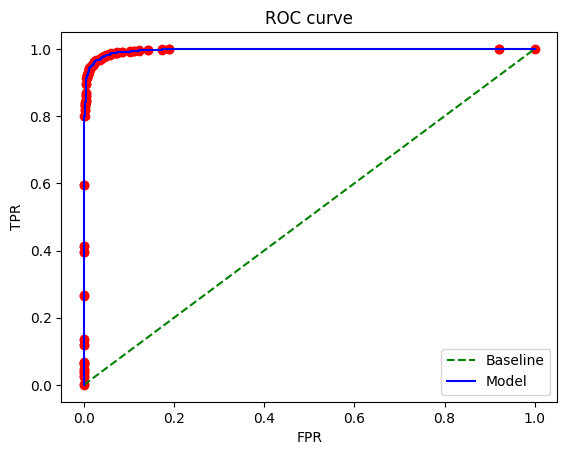

In [42]:
baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
fpr, tpr, thresholds = roc_curve(y_val, xgbc_result.predict_proba(X_val_encoded)[:,1])
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.legend()
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgbc_result.predict(X_test_encoded)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2617
           1       0.95      0.95      0.95       938

    accuracy                           0.97      3555
   macro avg       0.97      0.97      0.97      3555
weighted avg       0.97      0.97      0.97      3555



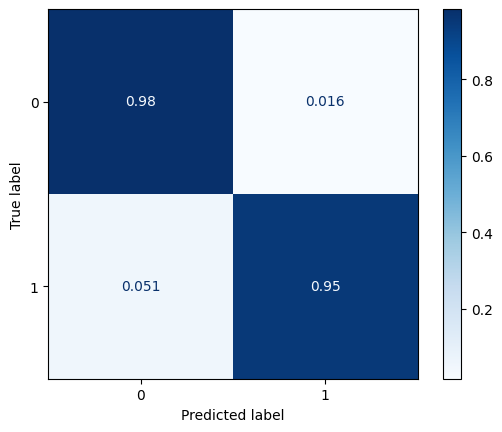

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)>

In [44]:
plot_confusion_matrix(xgbc_result, X_test_encoded, y_test)
xgbc_result.get_params

<AxesSubplot: >

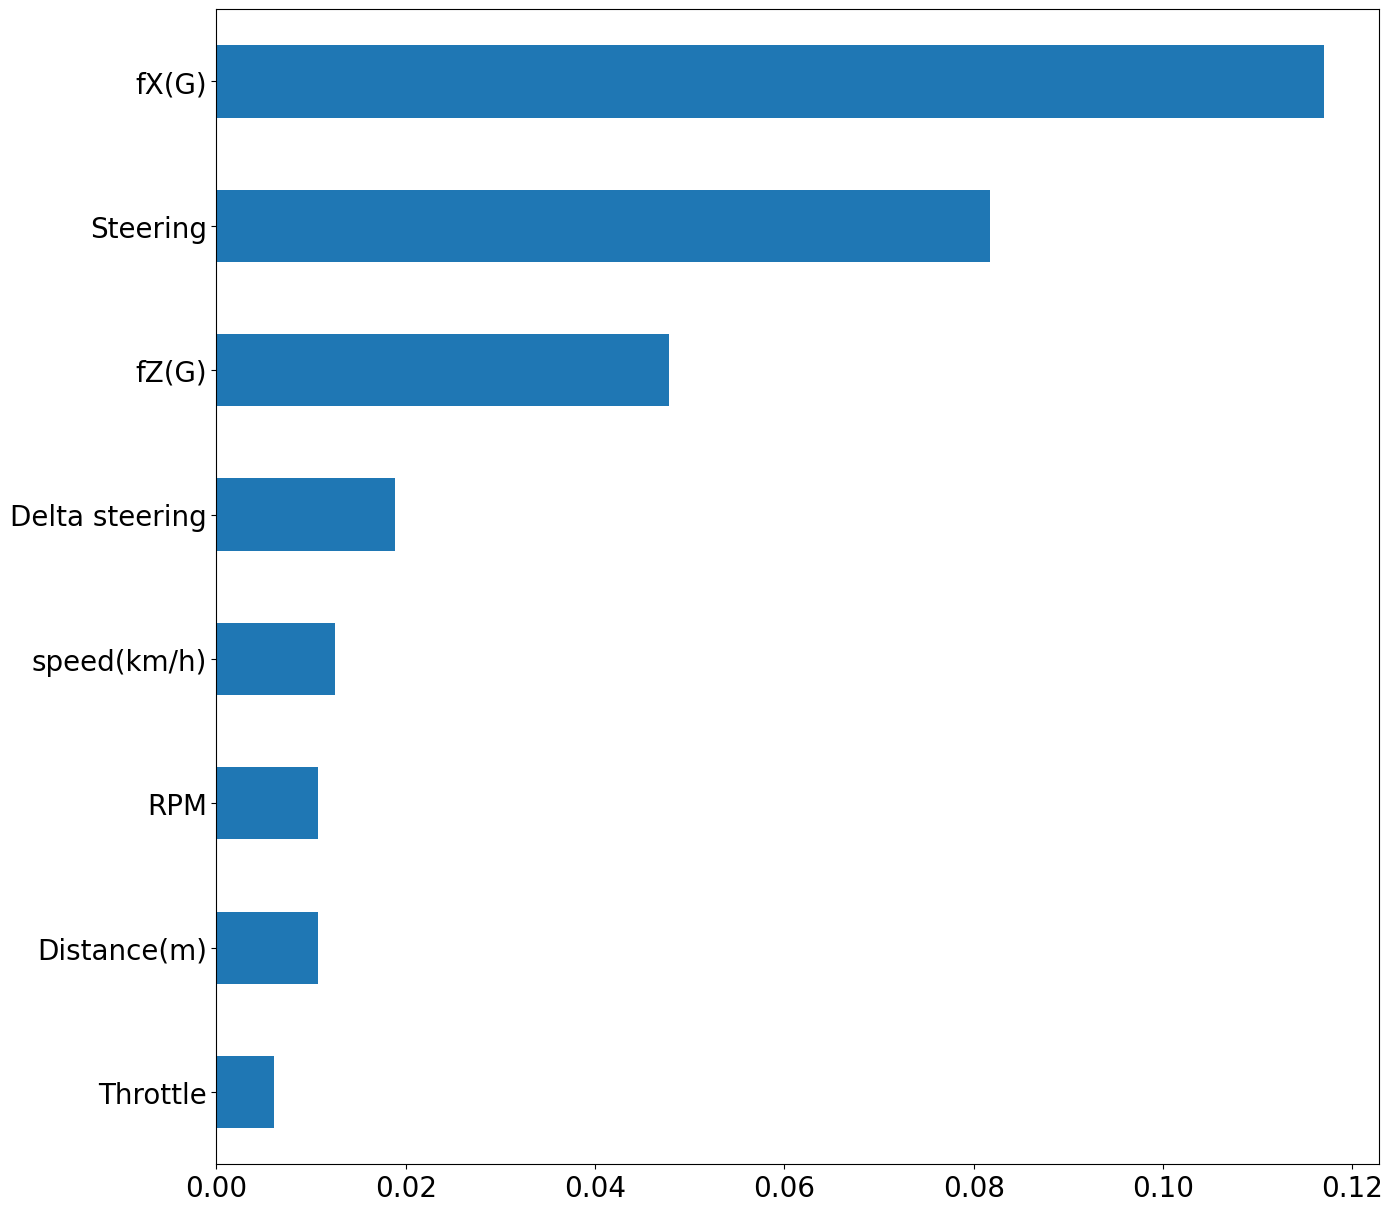

In [86]:
# permuter 정의
permuter = PermutationImportance(
    xgbc_result,  # model
    scoring="accuracy",  # metric
    n_iter=8,  # 다른 random seed를 사용하여 8번 반복
    random_state=42,
)

# 스코어를 다시 계산합니다.
permuter.fit(X_val_encoded, y_val)
feature_names = X_val_encoded.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True)
pi.iloc[-8:].plot.barh(figsize = (15,15), fontsize = 20)
# pi.plot.barh(figsize = (14,14))
# plt.title("Permutation Importance")

In [103]:
from pdpbox.pdp import pdp_isolate, pdp_plot

target_feature = "Slip issue"

isolated = pdp_isolate(
    model=xgbc_result,
    dataset=X_val_encoded,
    model_features=X_val_encoded.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

ModuleNotFoundError: No module named 'pdpbox'

In [67]:
import IPython
sw = eli5.show_weights(
    permuter,
    top=10,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names,  # list 형식으로 넣어야 합니다
)
type(sw)

html = sw.data
with open('html_file.html', 'w') as f:
    f.write(html)
f.close()

In [ ]:
print(f1_score(y_val,xgbc_result.predict(X_val_encoded)))
print(roc_auc_score(y_val,xgbc_result.predict(X_val_encoded)))
print(f1_score(y_val,[0] * len(y_val)))
print(roc_auc_score(y_val,[0] * len(y_val)))


0.9477167438782264
0.9665883476599809
0.0
0.5


In [ ]:
print(f1_score(y_test,xgbc_result.predict(X_test_encoded)))
print(roc_auc_score(y_test,xgbc_result.predict(X_test_encoded)))

0.9484316852737906
0.965735762478073


In [ ]:
### minmax 처리 후 x+0.5을 로그스케일하거나 x스퀘어를 한번 이상 수행하여 데이터 분포를 정규분포 형태로 수정.

